In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
# data collection
mnist = tf.keras.datasets.fashion_mnist

In [4]:
# loading of data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

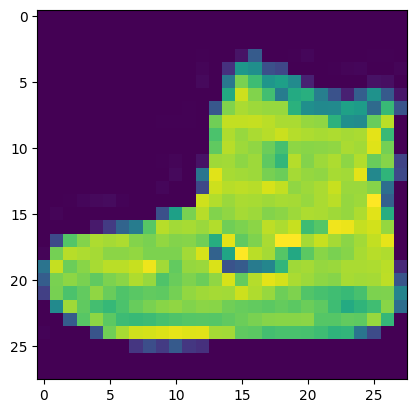

In [5]:
# data visulaization
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

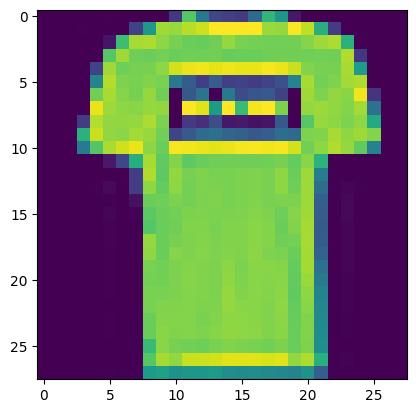

In [6]:
# data visulaization-2
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print(training_labels[1])
print(training_images[1])

In [7]:
# data normalisation
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [8]:
# design the model with 3 layers model
# Sequential defines a sequence of layers in the neural network.
# Flatten takes a square and turns it into a one-dimensional vector.
# Dense adds a layer of neurons.
# Activation functions tell each layer of neurons what to do:
# Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
# Softmax takes a set of values, and effectively picks the biggest one.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
# Model building and training
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5029 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3782 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3394 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3148 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2968 - accuracy: 0.8907


In [10]:
# Test the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8740


[0.34155476093292236, 0.8740000128746033]

In [11]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.3473395e-06 2.9709755e-09 5.3382557e-08 1.0153887e-07 8.6972484e-08
 2.2562766e-04 1.0858996e-06 1.3924679e-02 4.9213206e-05 9.8579776e-01]


In [12]:
print(test_labels[0])

9


In [13]:
classifications = model.predict(test_images)

print(classifications[1])

313/313 [==============================] - 1s 2ms/step
[1.3733379e-04 7.7284758e-12 9.9596810e-01 2.1040048e-08 1.0237271e-03
 3.2325412e-12 2.8709015e-03 6.6525686e-13 2.6174811e-09 2.5624336e-12]


In [14]:
print(test_labels[1])

2


In [15]:
# Hidden Layers increased
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4738
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3569
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3217
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2970
Epoch 5/5
313/313 [==============================] - 1s 4ms/step
[4.6388516e-07 1.2819289e-10 2.3793789e-09 1.2278821e-09 2.0004542e-08
 2.1260253e-03 1.1166871e-08 1.7571133e-03 6.9695738e-09 9.9611640e-01]
9


In [17]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[1])
print(test_labels[1])

2.15.0
Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


In [ ]:
## Error detection details:
## The Flatten layer is needed in this case because the input data for the neural network is a two-dimensional array (a 28x28 image), but the Dense layers expect one-dimensional input data.
## Without the Flatten layer, the input data would be passed to the Dense layers as a two-dimensional array, which would result in an error.

### Here's a more detailed explanation:

##The Dense layer expects input data in the following format: [batch_size, features]. In this case, the batch size is the number of images being processed at once, and the features are the individual pixels in each image.
##The input data for this neural network is a two-dimensional array with the shape (28, 28). This means that each image is represented as a 28x28 grid of pixels.
##To convert the two-dimensional input data into one-dimensional data, we need to flatten it. This means that we need to take all of the pixels in each image and arrange them in a single row.
##The Flatten layer does this for us. It takes the two-dimensional input data and reshapes it into a one-dimensional array with the shape [batch_size, 784]. This is because there are 28x28 = 784 pixels in each image.
##The one-dimensional output from the Flatten layer can then be passed to the Dense layers.
##In general, the Flatten layer is used whenever you have input data that is not already in the correct format for the Dense layers. For example, if you have input data that is a three-dimensional array (e.g., a color image), you would need to use a Flatten layer to convert it into a one-dimensional array before passing it to the Dense layers.

In [18]:
# Another checking
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-18-0b6fcdf4a2cb>", line 25, in <cell line: 25>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 4 5 9 4 0 2 3 3 3 5 7 8 9 7 2 6 3 1 2 8 5 8 4 3 2 6 6 8 7 1 9 6
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_78605]

In [19]:
# The error message points to an issue with the sparse_categorical_crossentropy loss function.
# The error message states that a label value of 9 is outside the valid range of [0, 5).
# This means that the model is expecting labels between 0 and 4, but it encountered a label of 9.
print(training_labels)
print(test_labels)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [20]:
# From above we can cnclude that there is need to change the output layer of the model to have 10 neurons instead of 5.

In [21]:
# Consider the effects of additional layers in the network.
# What will happen if you add another layer between the one with 512 and the final layer with 10?
# There isn't a significant impact -- because this is relatively simple data.
# For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4698
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3569
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3209
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2985
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[2.1666386e-07 9.3852685e-07 1.8636252e-06 1.4448700e-08 2.3231298e-07
 4.6558990e-03 1.8112951e-06 9.1800960e-03 5.5565857e-07 9.8615831e-01]
9


In [22]:
# Consider the impact of training for more or less epochs. Why do you think that would be the case?

# I have tried 15 epochs -- Got a model with a much better loss than the one with 5 Try 30 epochs
# Saw the loss value stops decreasing, and sometimes increases.
# This is a side effect of something called 'overfitting' which you can learn about [somewhere]
# It is something you need to keep an eye out for when training neural networks.
# There's no point in wasting your time training if you aren't improving your loss, right! :)
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.15.0
Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4949
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3700
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3340
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3112
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2936
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2770
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2667
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2554
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2482
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2363
Epoch 11/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2295
Epoch 12/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [23]:
# Before I trained, normalized the data, going from values that were 0 through 255 to values that were 0 through 1.
# What would be the impact of removing that?
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 4.1811
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5478
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5001
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4886
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[4.3066094e-15 1.5155472e-11 1.5190088e-18 5.0516358e-11 1.6904254e-18
 5.4081358e-02 5.2897203e-18 1.2568539e-01 4.9581597e-09 8.2023317e-01]
9


In [ ]:
# In a nutshell, normalization reduces the complexity of the problem your network is trying to solve.
## This can potentially increase the accuracy of your model and speed up the training.
### You bring the data on the same scale and reduce variance.
### None of the weights in the network are wasted on doing a normalization for you, meaning that they can be used more efficiently to solve the actual task at hand.

In [24]:
# Earlier when I trained for extra epochs I had an issue where my loss might change.
# It might have taken a bit of time for one to wait for the training to do that,
# One might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for one.
# If one reaches that after 3 epochs, why sit around waiting for it to finish a lot more epochs....
# So how would one fix that? Like any other program...One has callbacks! Let's see them in action...
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4733 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3592 - accuracy: 0.8679
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3214 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3011 - accuracy: 0.8884
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2796 - accuracy: 0.8961


In [25]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5007 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3774 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3370 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3112 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8801
Test loss: 0.3364871144294739, Test accuracy: 88.01000118255615


In [26]:
# It is the same neural network as earlier, but this time with convolutional layers added first.
## It will take longer, but look at the impact on the accuracy:

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

# It is likely gone up to about 93% on the training data and 91% on the validation data.

# Now try running it for more epochs—say about 20—and explore the results.
# While the training results might seem really good, the validation results may actually go down due to a phenomenon called overfitting.

# Overfitting occurs when the network learns the data from the training set too well, so it's specialised to recognize only that data.
# As a result is less effective at seeing other data in more general situations.
## For example, if you trained only on heels, then the network might be very good at identifying heels, but sneakers might confuse it.



2.15.0
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 128)      

In [27]:
# 1st step- Data gathering
# You'll notice that there's a change here and the training data needed to be reshaped.
# That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list,
# you have a single 4D list that is 60,000x28x28x1, and the same for the test images.
# If you don't do that, then you'll get an error when training because the convolutions do not recognize the shape.
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [28]:
# Step 2 - Model Defining
# Instead of the input layer at the top, you're going to add a convolutional layer. The parameters are:

# 1. The number of convolutions you want to generate. A value like 32 is a good starting point.
# 2. The size of the convolutional matrix, in this case a 3x3 grid.
# 3. The activation function to use, in this case use relu.
# 4. In the first layer, the shape of the input data.
## Follow the convolution with a max pooling layer, which is designed to compress the image while maintaining the content of the features that were highlighted by the convolution.
## By specifying (2,2) for the max pooling, the effect is to reduce the size of the image by a factor of 4.
## It creates a 2x2 array of pixels and picks the largest pixel value, turning 4 pixels into 1.
## It repeats this computation across the image, and in so doing halves the number of horizontal pixels and halves the number of vertical pixels.
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 128)             

In [29]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [30]:
# Model buidling and training:
# Compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.4429 - accuracy: 0.8403
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2980 - accuracy: 0.8905
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2534 - accuracy: 0.9060
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2195 - accuracy: 0.9184
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2604 - accuracy: 0.9068
Test loss: 0.2603716254234314, Test accuracy: 90.67999720573425


In [31]:
 # Visualize the convolutions and pooling:
 ## Now shows the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9).
 ## They're all shoes. Take a look at the result of running the convolution on each and you'll begin to see common features between them emerge.
 ## Now, when the DNN is training on that data, it's working with a lot less information, and it's perhaps finding a commonality between shoes based on that convolution and pooling combination.

 print(test_labels[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 22ms/step


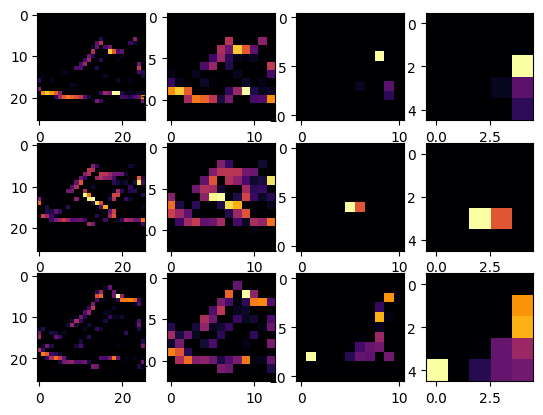

In [32]:
## Now you can select some of the corresponding images for those labels and render what they look like going through the convolutions.
## So, in the following code, FIRST_IMAGE, SECOND_IMAGE and THIRD_IMAGE are all the indexes for value 9, an ankle boot.
## And you should see something like the following, where the convolution is taking the essence of the sole of the shoe,
## effectively spotting that as a common feature across all shoes.

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [33]:
# Change the number of convolutions from 32 to either 16 or 64.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

print(test_labels[:100])


Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.4670 - accuracy: 0.8302
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3143 - accuracy: 0.8859
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2686 - accuracy: 0.9019
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2361 - accuracy: 0.9127
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2648 - accuracy: 0.9049
Test loss: 0.26478099822998047, Test accuracy: 90.49000144004822
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 41ms/step


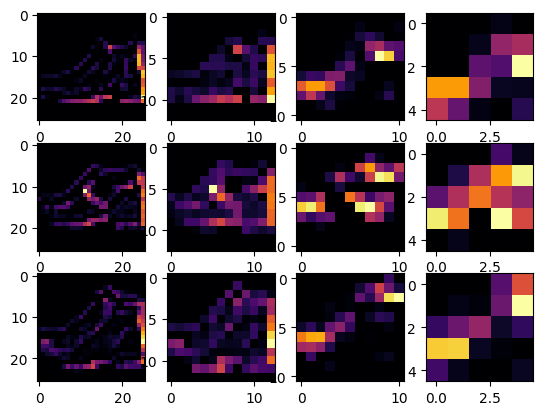

In [35]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [36]:
# Add more convolutions neural network layer for this dataset and then proceed as previous. And also check the accuracy

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))


Epoch 1/5
1875/1875 [==============================] - 38s 19ms/step - loss: 0.6128 - accuracy: 0.7743
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4210 - accuracy: 0.8454
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3716 - accuracy: 0.8637
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3362 - accuracy: 0.8751
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.3414 - accuracy: 0.8740
Test loss: 0.34142884612083435, Test accuracy: 87.40000128746033


In [37]:
print(test_labels[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 22ms/step


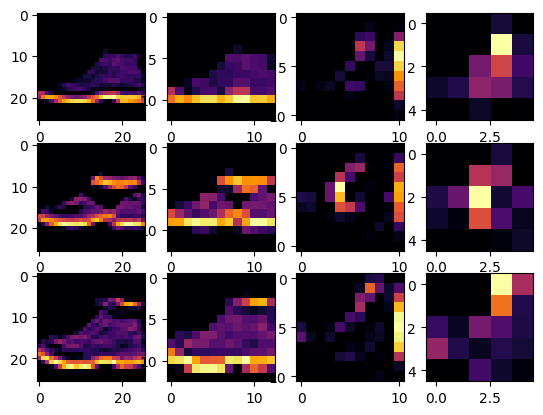

In [40]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 9
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
# Test Accuracy no so improved by adding more convolution layer
# But image clarity is improved